Import libraries

In [1]:
import pandas as pd #loads data set
import numpy as np #performs arrays

Choose data set from local directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


Load data set

In [3]:
dataset = pd.read_csv('salary.csv')
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


Summarize data set

In [4]:
dataset.shape

(32561, 5)

In [5]:
dataset.head(5)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [6]:
dataset.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


Mapping salary to Binary Value

In [7]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
dataset.head

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>

Segregate data set into X and Y

In [17]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [18]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

Splitting Data into Train & Test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 0)

Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Finding the best K Value

Text(0, 0.5, 'Mean Error')

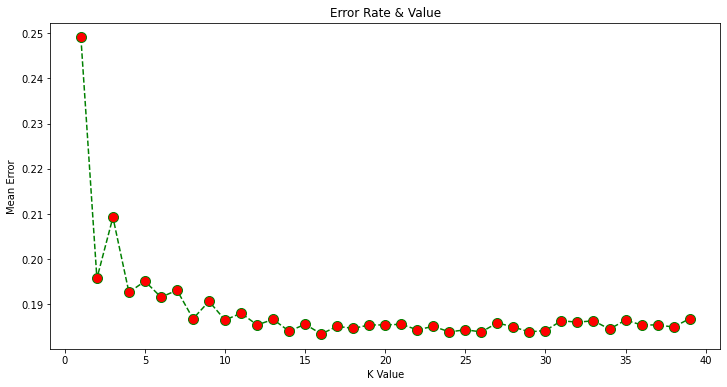

In [21]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Calculating error from K values between 1 and 40
for i in range(1, 40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color = 'green', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate & Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
#plt.show()

Training

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

Predict for a specific new employee

In [23]:
age = int(input('Enter New Employee\'s Age: ' ))
edu = int(input('Enter New Employee\'s Education: ' ))
cg = int(input('Enter New Employee\'s Capital Gain: ' ))
wh = int(input('Enter New Employee\'s Hours per week: ' ))
new_emp = [[age, edu, cg, wh]]
result = model.predict(sc.transform(new_emp))
result

if result ==1:
  print('Employee might get Salary above 50K')
else:
  print('Employee might not get Salary above 50K')

Enter New Employee's Age: 32
Enter New Employee's Education: 14
Enter New Employee's Capital Gain: 0
Enter New Employee's Hours per week: 55
Employee might not get Salary above 50K


Predict for all data set

In [24]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Evaluate model using Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(cm)

print('Accuracy of the Model: {0}%'.format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix
[[4709  257]
 [ 938  609]]
Accuracy of the Model: 81.65208045447567%
